# Using Logistic Regression, K-nearest Neighbors, Decision tree 

In [5]:
import sklearn
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
!pip install --upgrade scikit-learn

In [7]:
pip show scikit-learn

Name: scikit-learn
Version: 1.3.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\palla\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: scikit-learn-intelex
Note: you may need to restart the kernel to use updated packages.


In [8]:
#Load CSV dataset
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
#Deleting the Id column
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#Display basic stats of data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
#Displaying number of samples on each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [13]:
#check null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

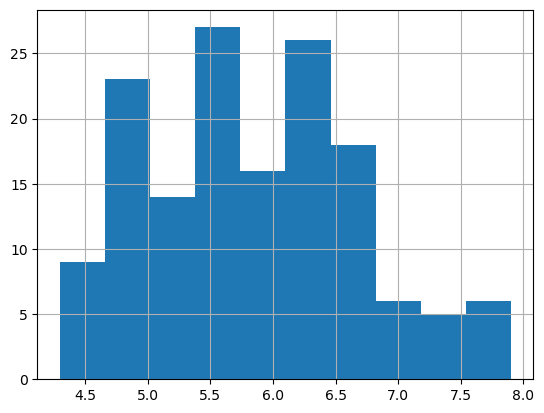

In [14]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

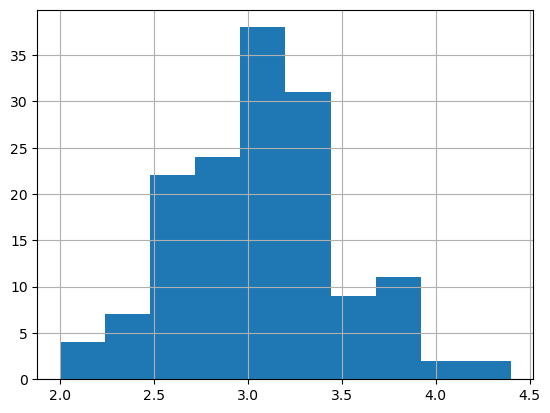

In [15]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

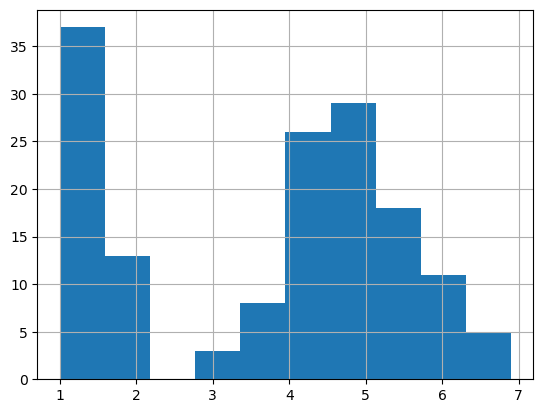

In [16]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

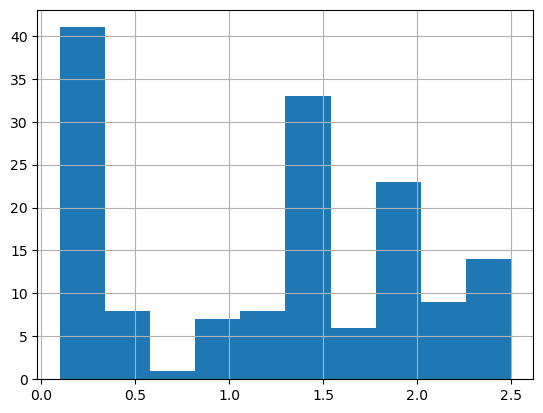

In [17]:
df['PetalWidthCm'].hist()

In [18]:
#Create list of coloes for corresponding class labels
colors = ['red', 'green', 'blue']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

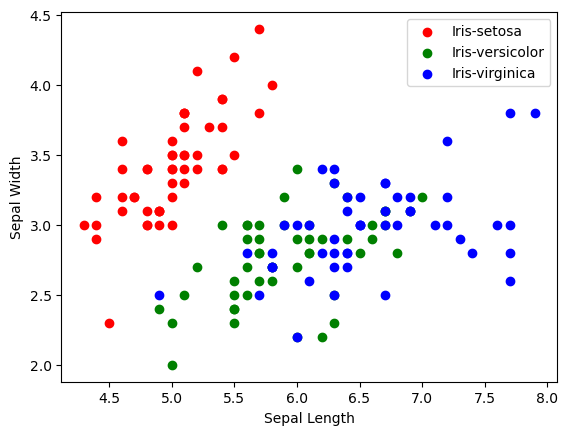

In [19]:
for i in range(3):
    #filter data on each class
    x = df[df['Species'] == species[i]]
    #plot the scatter plot
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

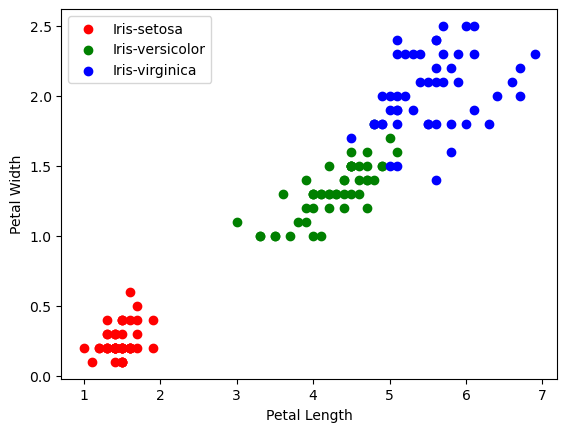

In [20]:
for i in range(3):
    #filter data on each class
    x = df[df['Species'] == species[i]]
    #plot the scatter plot
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

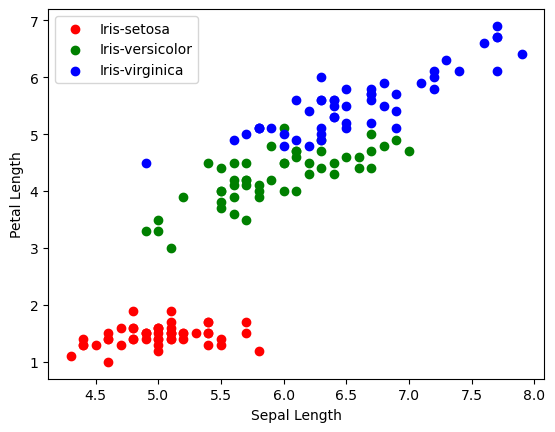

In [21]:
for i in range(3):
    #filter data on each class
    x = df[df['Species'] == species[i]]
    #plot the scatter plot
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

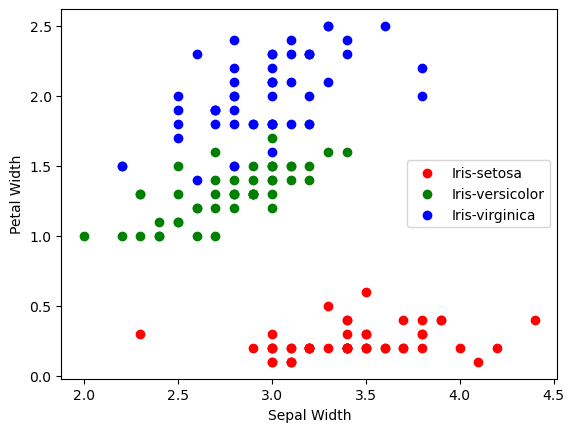

In [22]:
for i in range(3):
    #filter data on each class
    x = df[df['Species'] == species[i]]
    #plot the scatter plot
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

In [23]:
#display the correlation matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

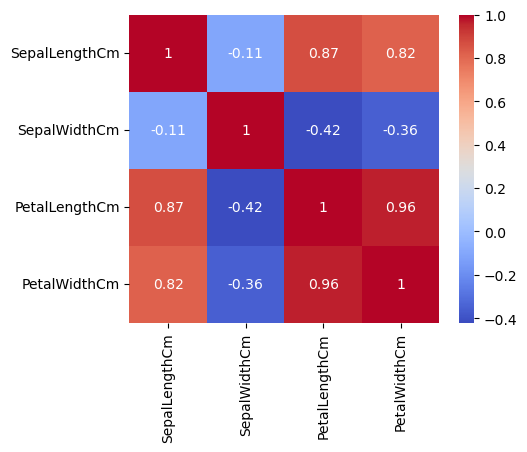

In [24]:
corr=df.corr()
#plot the heat map
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

#input data
X = df.drop(columns=['Species'])
#output data
Y = df['Species']
#split the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [27]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train.values,Y_train.values)
print("Logistic Regression Accuracy: ",model.score(X_test,Y_test)*100)

Logistic Regression Accuracy:  97.77777777777777


In [28]:
#K-nearest Neighbors
model = KNeighborsClassifier()
model.fit(X_train.values,Y_train.values)
print("K-nearest neighbors Accuracy: ",model.score(X_test,Y_test)*100)

K-nearest neighbors Accuracy:  100.0


In [29]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train.values,Y_train.values)
print("Decision Tree Accuracy: ",model.score(X_test,Y_test)*100)

Decision Tree Accuracy:  97.77777777777777
